In [39]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [40]:
bank=pd.read_csv('bank-full.csv',sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [41]:
bank.shape

(45211, 17)

In [42]:
bank1=pd.get_dummies(bank.iloc[:,0:16])

In [43]:
bank1['y']=np.where(bank['y']=='yes',1,0)
bank1

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,1,0,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [44]:
X=bank1.iloc[:,0:16]
Y=bank1.iloc[:,16]

In [45]:
classifier=LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [46]:
y_pred=classifier.predict(X)

In [47]:
y_pred_df=pd.DataFrame({'actual':Y,
                        'precdited_prob':classifier.predict(X)})

In [48]:
y_pred_df

,actual,precdited_prob
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,0,0
45208,0,0
45209,0,0


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[36038  1576]
 [ 4782  2815]]


In [50]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     37614
           1       0.64      0.37      0.47      7597

    accuracy                           0.86     45211
   macro avg       0.76      0.66      0.69     45211
weighted avg       0.84      0.86      0.84     45211



In [51]:
classifier.predict_proba(X)[:,1]

array([0.00380928, 0.47902746, 0.26053173, ..., 0.4163019 , 0.00500314,
       0.95780887])

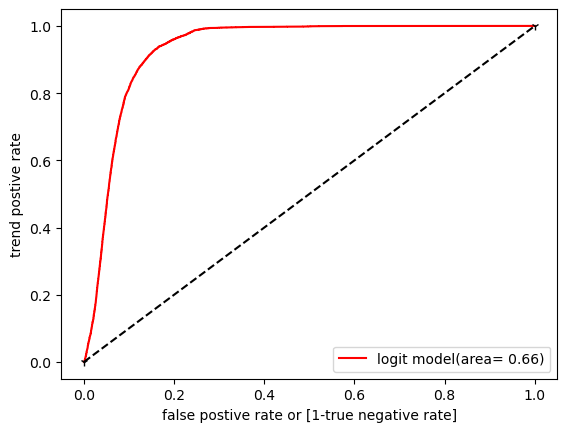

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,threshold= roc_curve(Y,classifier.predict_proba(X)[:,1])
auc=roc_auc_score(Y,y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red', label='logit model(area= %0.2f)' %auc)
plt.plot([0,1],[0,1], 'k--1')
plt.xlabel('false postive rate or [1-true negative rate]')
plt.ylabel('trend postive rate')
plt.legend()
plt.show()

In [53]:
auc

0.6643208551055032